<a href="https://colab.research.google.com/github/Humfhrie/Market-basket-analysis/blob/main/BigQuery_bquxjob_2aef8ea5_18f28bf35ca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'modern-nation-386000' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=modern-nation-386000:US:bquxjob_2aef8ea5_18f28bf35ca)
back to BigQuery to edit the query within the BigQuery user interface.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_2aef8ea5_18f28bf35ca') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT
o.user_id,
(oi.order_id),
product_id,
num_of_item AS quantity, 
name,
sale_price,
o.status,
o.created_at AS Date,
city
FROM `bigquery-public-data.thelook_ecommerce.order_items` AS oi
JOIN `bigquery-public-data.thelook_ecommerce.orders` AS o ON oi.user_id = o.user_id
JOIN `bigquery-public-data.thelook_ecommerce.products` AS p ON oi.id = p.id
JOIN `bigquery-public-data.thelook_ecommerce.events` AS e ON oi.id = e.id
LIMIT 1000


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [49]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_2aef8ea5_18f28bf35ca') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,user_id,order_id,product_id,quantity,name,sale_price,status,Date,city
0,516,638,14159,1,Curve Appeal Long Sleeve Waffle Knit Wrap Card...,0.49,Cancelled,2021-01-27 01:39:00+00:00,Mineiros
1,516,638,14159,1,Curve Appeal Long Sleeve Waffle Knit Wrap Card...,0.49,Returned,2022-05-31 01:39:00+00:00,Mineiros
2,922,1148,14159,4,Ed Hardy Womens Rope & Tiger Hoodie - Mustard,0.49,Complete,2021-10-15 16:09:00+00:00,Claye-Souilly
3,922,1148,14159,2,Ed Hardy Womens Rope & Tiger Hoodie - Mustard,0.49,Complete,2023-07-04 16:09:00+00:00,Claye-Souilly
4,922,1148,14159,1,Ed Hardy Womens Rope & Tiger Hoodie - Mustard,0.49,Processing,2023-07-27 16:09:00+00:00,Claye-Souilly
...,...,...,...,...,...,...,...,...,...
995,8888,11179,28567,1,Adidas Golf Men's ClimaLite 3-Stripes Cuff Pol...,7.95,Processing,2024-04-28 12:01:46.739382+00:00,Vecindario
996,8888,11179,28567,1,Adidas Golf Men's ClimaLite 3-Stripes Cuff Pol...,7.95,Returned,2024-04-28 12:01:46.739382+00:00,Vecindario
997,11223,14167,15390,4,Michael Kors Mens 2 Button Solid Navy Blue Woo...,7.95,Complete,2024-03-29 16:36:00+00:00,Beijing
998,11223,14167,15390,1,Michael Kors Mens 2 Button Solid Navy Blue Woo...,7.95,Complete,2024-04-23 16:36:00+00:00,Beijing


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [50]:
results.describe()

,user_id,order_id,product_id,quantity,sale_price
count,1000.0,1000.0,1000.0,1000.0,1000.000000
mean,7859.638,9885.384,15158.608,1.61,5.840610
std,4784.366066,6013.62944,8073.051774,0.905936,1.621346
min,10.0,12.0,141.0,1.0,0.490000
25%,3515.0,4399.0,9141.25,1.0,4.990000
50%,7868.5,9922.5,13921.0,1.0,6.360000
75%,11817.5,14913.25,23214.0,2.0,6.990000
max,16218.0,20269.0,29071.0,4.0,7.950000


In [51]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   user_id     1000 non-null   Int64              
 1   order_id    1000 non-null   Int64              
 2   product_id  1000 non-null   Int64              
 3   quantity    1000 non-null   Int64              
 4   name        1000 non-null   object             
 5   sale_price  1000 non-null   float64            
 6   status      1000 non-null   object             
 7   Date        1000 non-null   datetime64[us, UTC]
 8   city        1000 non-null   object             
dtypes: Int64(4), datetime64[us, UTC](1), float64(1), object(3)
memory usage: 74.3+ KB


In [52]:
results['product'] = results['product_id'].astype(str) + "-" + results['name']
results.head(3)

,user_id,order_id,product_id,quantity,name,sale_price,status,Date,city,product
0,516,638,14159,1,Curve Appeal Long Sleeve Waffle Knit Wrap Card...,0.49,Cancelled,2021-01-27 01:39:00+00:00,Mineiros,14159-Curve Appeal Long Sleeve Waffle Knit Wra...
1,516,638,14159,1,Curve Appeal Long Sleeve Waffle Knit Wrap Card...,0.49,Returned,2022-05-31 01:39:00+00:00,Mineiros,14159-Curve Appeal Long Sleeve Waffle Knit Wra...
2,922,1148,14159,4,Ed Hardy Womens Rope & Tiger Hoodie - Mustard,0.49,Complete,2021-10-15 16:09:00+00:00,Claye-Souilly,14159-Ed Hardy Womens Rope & Tiger Hoodie - Mu...


In [53]:
grouped_orders = results.groupby('order_id')['product'].apply(list).reset_index(name='products')
grouped_orders.head(3)

,order_id,products
0,12,[15334-Lucky Brand Women's Plus-Size Moroccan ...
1,79,[28378-YogaColors Crystal Boatneck Dolman Slee...
2,195,[24832-Columbia Women's Vista Ridge T-Shirt]


In [54]:
# Explode the products list into separate rows
exploded_df = grouped_orders.explode('products')
exploded_df.head()

,order_id,products
0,12,15334-Lucky Brand Women's Plus-Size Moroccan M...
1,79,28378-YogaColors Crystal Boatneck Dolman Sleev...
2,195,24832-Columbia Women's Vista Ridge T-Shirt
3,280,28548-Tommy Hilfiger Women V-neck Striped T-shirt
3,280,28548-Tommy Hilfiger Women V-neck Striped T-shirt


In [55]:
df = pd.get_dummies(exploded_df, columns=['products'], prefix='', prefix_sep='')
df.head()

,order_id,10029-Medela Maternity Support Belt,10298-Anna-Kaci S/M Fit Blue 3/4 Sleeve Fitted Single Button Lady Like Blazer Jacket,10822-Cashmere Like Viscose Super Soft Faux Pashmina Wrap,10822-Flyaway Back Satin Plus Size Babydoll,10822-Paul Fredrick Trim Fit Twill Weave Flat Front Suit Trouser,10935-Skelapparel Rockabilly Gothic Cut up - Cutout Ripped Look Leggings S/M,11005-Woman Within Plus Size Top tank with lace trim,11009-American Apparel Stripe Knee-High Sock,11009-INC International Concepts Plaid Vest,...,9414-3-Piece Matching Set Laura High Quality Lace Bra Thong & Bikini #SL000063 Made in Colombia,9414-7 For All Mankind Men's Classic Standard Straight Leg Jean In Blue Shade,9430-Nautica Men's Signal Flag Boat Print Knit Boxer,9430-Suncloud Polarized Optics Cookie Sunglasses,9442-D&G Dolce & Gabbana Women's 0DD8075 Square Sunglasses,9442-prAna Women's Monarch Convertible Pant,9464-Oakley Scalpel Round Sunglasses,9470-Weekender Surfside Microfiber Swim Trunk,9498-Angelina Dozen-Pack Leopard Print G-String,9505-Geoffrey Beene Men's Regular Fit Pinpoint Dress Shirt
0,12,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,79,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,195,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,280,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,280,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
# Group by order_id and sum the one-hot encoded columns
one_hot_encoded_df = df.groupby('order_id').sum()
one_hot_encoded_df.head()

,10029-Medela Maternity Support Belt,10298-Anna-Kaci S/M Fit Blue 3/4 Sleeve Fitted Single Button Lady Like Blazer Jacket,10822-Cashmere Like Viscose Super Soft Faux Pashmina Wrap,10822-Flyaway Back Satin Plus Size Babydoll,10822-Paul Fredrick Trim Fit Twill Weave Flat Front Suit Trouser,10935-Skelapparel Rockabilly Gothic Cut up - Cutout Ripped Look Leggings S/M,11005-Woman Within Plus Size Top tank with lace trim,11009-American Apparel Stripe Knee-High Sock,11009-INC International Concepts Plaid Vest,11315-Jones New York Women's Mj Cowl Draped Dress,...,9414-3-Piece Matching Set Laura High Quality Lace Bra Thong & Bikini #SL000063 Made in Colombia,9414-7 For All Mankind Men's Classic Standard Straight Leg Jean In Blue Shade,9430-Nautica Men's Signal Flag Boat Print Knit Boxer,9430-Suncloud Polarized Optics Cookie Sunglasses,9442-D&G Dolce & Gabbana Women's 0DD8075 Square Sunglasses,9442-prAna Women's Monarch Convertible Pant,9464-Oakley Scalpel Round Sunglasses,9470-Weekender Surfside Microfiber Swim Trunk,9498-Angelina Dozen-Pack Leopard Print G-String,9505-Geoffrey Beene Men's Regular Fit Pinpoint Dress Shirt
order_id,,,,,,,,,,,,,,,,,,,,,
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# Convert counts to 1s and 0s
one_hot_encoded_df = one_hot_encoded_df.applymap(lambda x: 1 if x > 0 else 0)
one_hot_encoded_df.head()

,10029-Medela Maternity Support Belt,10298-Anna-Kaci S/M Fit Blue 3/4 Sleeve Fitted Single Button Lady Like Blazer Jacket,10822-Cashmere Like Viscose Super Soft Faux Pashmina Wrap,10822-Flyaway Back Satin Plus Size Babydoll,10822-Paul Fredrick Trim Fit Twill Weave Flat Front Suit Trouser,10935-Skelapparel Rockabilly Gothic Cut up - Cutout Ripped Look Leggings S/M,11005-Woman Within Plus Size Top tank with lace trim,11009-American Apparel Stripe Knee-High Sock,11009-INC International Concepts Plaid Vest,11315-Jones New York Women's Mj Cowl Draped Dress,...,9414-3-Piece Matching Set Laura High Quality Lace Bra Thong & Bikini #SL000063 Made in Colombia,9414-7 For All Mankind Men's Classic Standard Straight Leg Jean In Blue Shade,9430-Nautica Men's Signal Flag Boat Print Knit Boxer,9430-Suncloud Polarized Optics Cookie Sunglasses,9442-D&G Dolce & Gabbana Women's 0DD8075 Square Sunglasses,9442-prAna Women's Monarch Convertible Pant,9464-Oakley Scalpel Round Sunglasses,9470-Weekender Surfside Microfiber Swim Trunk,9498-Angelina Dozen-Pack Leopard Print G-String,9505-Geoffrey Beene Men's Regular Fit Pinpoint Dress Shirt
order_id,,,,,,,,,,,,,,,,,,,,,
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# Encoding all values in results1 data frame to 0 and 1
def encode(product_freq):
    res = 0
    if product_freq > 0:
        res = 1
    return res

basket_input = one_hot_encoded_df.applymap(encode)

In [59]:
basket_input.head(4)

,10029-Medela Maternity Support Belt,10298-Anna-Kaci S/M Fit Blue 3/4 Sleeve Fitted Single Button Lady Like Blazer Jacket,10822-Cashmere Like Viscose Super Soft Faux Pashmina Wrap,10822-Flyaway Back Satin Plus Size Babydoll,10822-Paul Fredrick Trim Fit Twill Weave Flat Front Suit Trouser,10935-Skelapparel Rockabilly Gothic Cut up - Cutout Ripped Look Leggings S/M,11005-Woman Within Plus Size Top tank with lace trim,11009-American Apparel Stripe Knee-High Sock,11009-INC International Concepts Plaid Vest,11315-Jones New York Women's Mj Cowl Draped Dress,...,9414-3-Piece Matching Set Laura High Quality Lace Bra Thong & Bikini #SL000063 Made in Colombia,9414-7 For All Mankind Men's Classic Standard Straight Leg Jean In Blue Shade,9430-Nautica Men's Signal Flag Boat Print Knit Boxer,9430-Suncloud Polarized Optics Cookie Sunglasses,9442-D&G Dolce & Gabbana Women's 0DD8075 Square Sunglasses,9442-prAna Women's Monarch Convertible Pant,9464-Oakley Scalpel Round Sunglasses,9470-Weekender Surfside Microfiber Swim Trunk,9498-Angelina Dozen-Pack Leopard Print G-String,9505-Geoffrey Beene Men's Regular Fit Pinpoint Dress Shirt
order_id,,,,,,,,,,,,,,,,,,,,,
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [61]:
frequent_itemsets = apriori(basket_input, min_support=0.001, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.002105,(10029-Medela Maternity Support Belt)
1,0.002105,(10298-Anna-Kaci S/M Fit Blue 3/4 Sleeve Fitte...
2,0.002105,(10822-Cashmere Like Viscose Super Soft Faux P...
3,0.002105,(10822-Flyaway Back Satin Plus Size Babydoll)
4,0.002105,(10822-Paul Fredrick Trim Fit Twill Weave Flat...


In [62]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(14202-Columbia Men's Bridge Too Far 1/2 Zip S...,(15434-Haggar Men's Bankley Solid Sweater),0.002105,0.002105,0.002105,1.0,475.0,0.002101,inf,1.0
1,(15434-Haggar Men's Bankley Solid Sweater),(14202-Columbia Men's Bridge Too Far 1/2 Zip S...,0.002105,0.002105,0.002105,1.0,475.0,0.002101,inf,1.0


In [63]:
import networkx as nx

G = nx.Graph()
for _, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

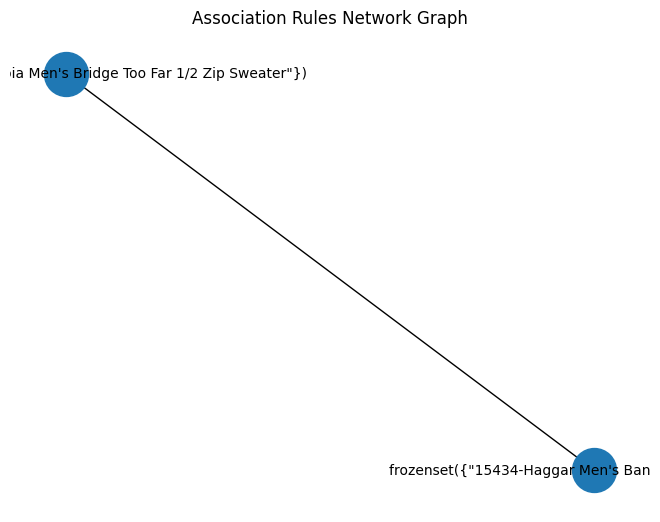

In [64]:
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=10, font_color='black')
plt.title('Association Rules Network Graph')
plt.show()

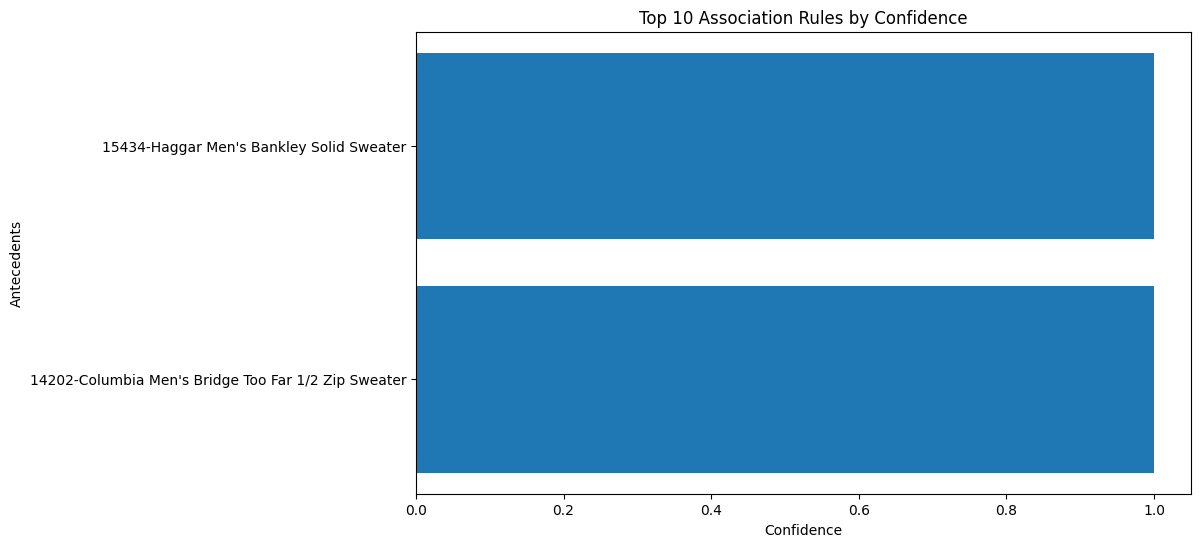

In [65]:
import matplotlib.pyplot as plt

# Convert frozensets to strings and store them in a new column
top_rules['antecedents_str'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))

top_n = 10
top_rules = top_rules.nlargest(top_n, 'confidence')

plt.figure(figsize=(10, 6))
plt.barh(top_rules['antecedents_str'], top_rules['confidence'])
plt.xlabel('Confidence')
plt.ylabel('Antecedents')
plt.title(f'Top {top_n} Association Rules by Confidence')
plt.show()
